# Face Detection Challenge

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

### Objectives
-  visualize images
-  preprocess images for Neural Networks
-  fit a custom CNN for a regression task
-  fine-tune a analyse model performance

## 1. Visualize images

👉 Load the dataset (200 Mo)

add test change

In [31]:
data = pd.read_csv("../../data/images.csv")
data = data.sample(frac=1)

In [32]:
data

,age,pixels
18086,50,69 86 113 92 123 165 176 184 185 192 214 194 1...
16635,43,137 137 136 129 117 100 62 35 73 96 107 117 12...
1006,1,0 1 0 1 11 42 40 119 180 188 189 194 194 191 1...
13872,35,82 77 78 91 123 169 202 213 198 196 188 172 15...
5086,24,109 49 36 28 26 33 27 26 34 84 133 171 177 191...
...,...,...
22038,70,72 72 72 72 72 72 71 71 72 74 76 88 88 90 91 9...
20852,61,156 161 169 160 150 159 208 199 183 184 191 19...
7716,26,136 128 124 128 126 125 127 123 114 106 128 18...
18276,50,189 194 192 178 75 24 51 84 100 111 112 122 13...


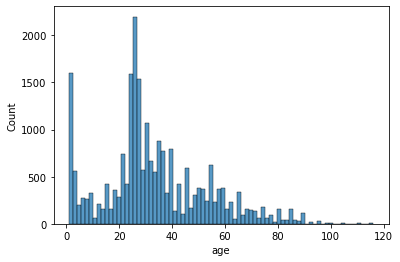

In [18]:
sns.histplot(data.age);

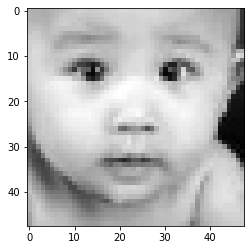

In [19]:
plt.imshow(np.array(data['pixels'][0].split(), dtype="int32").reshape(48,48), cmap="gray")

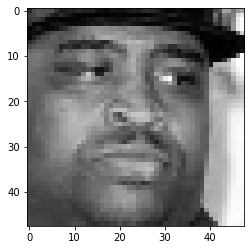

In [20]:
plt.imshow(np.array(data['pixels'][10000].split(), dtype="int32").reshape(48,48), cmap="gray")

## 2. Processing

In [21]:
X = data["pixels"].apply(lambda x: np.array(x.split(), dtype="int32"))
X = np.vstack(X.values)

X = X.reshape(-1, 48, 48, 1)

# Normalize data
X = X / 255

y = np.array(data['age'])

In [22]:
X.shape

(23705, 48, 48, 1)

In [ ]:
pd.DataFrame(X[0,:,:,0])

## Neural Network for Age prediction

In [24]:
def init_model():
    model = Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape = (48, 48, 1), activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation = 'relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(units = 64, activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(units = 10, activation = 'relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(units = 1, activation = 'linear'))
    
    return model

model = init_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)               

In [25]:
def compile_model(model):
    model.compile(loss='mse',
                  optimizer='adam',
                  metrics=['mae'])
    return model

In [26]:
def fit_model(model, X, y):
    es = EarlyStopping(patience=2, verbose=1, restore_best_weights=True)

    history = model.fit(X, y, 
                    validation_split=0.3,
                    callbacks=[es], 
                    epochs=100, 
                    batch_size=64)
    return history

In [27]:
model = init_model()
model = compile_model(model)
history = fit_model(model, X, y)

Epoch 1/100
260/260 [==============================] - 24s 89ms/step - loss: 721.0160 - mae: 21.0696 - val_loss: 382.3300 - val_mae: 14.3994
Epoch 2/100
260/260 [==============================] - 22s 83ms/step - loss: 441.2464 - mae: 16.2418 - val_loss: 250.7667 - val_mae: 11.9263
Epoch 3/100
260/260 [==============================] - 21s 83ms/step - loss: 405.2090 - mae: 15.2682 - val_loss: 228.1219 - val_mae: 11.3896
Epoch 4/100
260/260 [==============================] - 22s 86ms/step - loss: 380.4825 - mae: 14.7489 - val_loss: 204.8281 - val_mae: 11.0547
Epoch 5/100
260/260 [==============================] - 23s 89ms/step - loss: 405.3897 - mae: 15.0909 - val_loss: 242.3130 - val_mae: 11.5467
Epoch 6/100
260/260 [==============================] - 23s 87ms/step - loss: 364.8723 - mae: 14.2748 - val_loss: 204.1881 - val_mae: 10.6237
Epoch 7/100
260/260 [==============================] - 22s 84ms/step - loss: 373.4790 - mae: 14.5448 - val_loss: 262.1248 - val_mae: 12.0104
Epoch 8/100
2

In [28]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['mae'], label='train mae'  + exp_name)
    ax2.plot(history.history['val_mae'], label='val mae'  + exp_name)
    ax2.set_title('mae')
    ax2.legend()
    return (ax1, ax2)

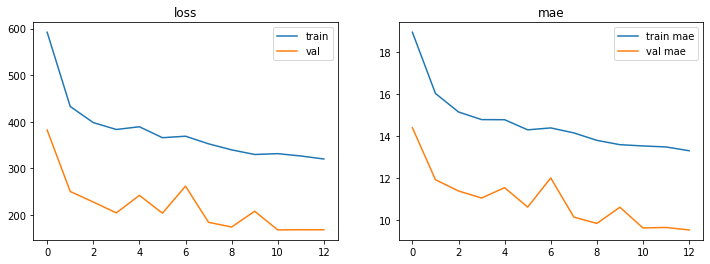

In [29]:
plot_history(history);

In [30]:
from sklearn.metrics import mean_absolute_error

# Baseline MAE predicting always mean age
mae_baseline = mean_absolute_error(y, np.ones(y.shape) * y.mean())

print(f'baseline MAE: {mae_baseline} years')

baseline MAE: 15.34814871735347 years
